In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback

# import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


22:51:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=701365;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=790856;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=366468;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=867339;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

22:51:12 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=899984;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=593249;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

22:51:12 INFO      Starting 3ML!                                                                     ]8;id=730261;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=148994;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=825858;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=461842;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=29089;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=459603;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=468433;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=256879;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=735704;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=634386;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=165852;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=76481;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

22:51:13 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=203542;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=515080;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=75342;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759034;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=292210;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=946526;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:51:13 WARNING   No fermitools installed                                              ]8;id=768603;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=186058;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 409.10it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 35.63it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 35.63it/s]   

Yourlib init successfully!!!


In [6]:
%matplotlib inline
#####   Data Initialize


maptree = "../../data/KM2A1234full_skymap_rcy.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"
response = "../../data/KM2A1234full_mcpsfnewfix13.root"

region_name="Diffuse_KM2A_fixpfixspecfm"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(120,360,10))): #15
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 7.0
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()
    KM2A.psf_integration_method="exact"


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=20, rtindex=10, rtp=5,  detector="KM2A", roi=roi, pf=True, sf=True, kf=False, indexf=False, mkf=True, mindexf=True) #, fixall=True,  , Kscale= 1e-25 #, indexb=(-5.5, -1.5)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, piv=50, name=region_name, ifreturnratio=True, Kb=(1e-17, 1e-14), indexb=(-4, -2), index=-3, K=5e-16
                ) # , , Kn=1e-25
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50)
    import matplotlib as mpl

    x_Max=10000.
    x_Min=1
    y_Min=0.2e-15
    y_Max=1e-9
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


In [ ]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
dkf=[]
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    dkf.append(resultsall[i][2])
oldresults=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall.npy",results)

In [9]:
region_name="Diffuse_KM2A"
results = np.load(f"../res/{region_name}/resultsall.npy")
gc=results[0]
dk=results[1]
den=results[3]
dep=results[4]
di = results[5]
die = results[6]
dien = results[7]
diep = results[8]

In [24]:
np.array(de)/np.array(dk)

array([0.20522786, 0.        , 0.03732326, 0.        , 0.23451209,
       0.07326826, 0.02335854, 0.03066714, 0.07612452, 0.19523364,
       0.63109781, 0.24842562, 0.11865793, 0.10542615, 0.2129501 ,
       0.25505231, 0.22475376, 0.08668801, 0.03545017, 0.08948481,
       0.45318637, 0.45394197, 1.92721631])

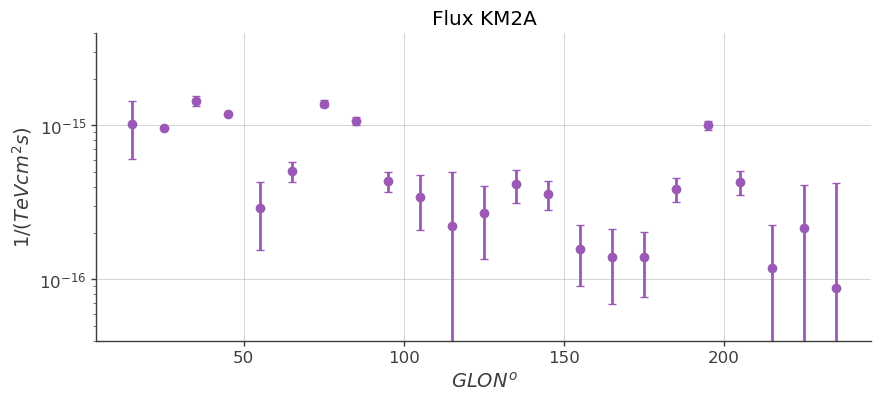

In [34]:
%matplotlib inline
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9*2, np.array(de)*1e9*2], fmt="o", capsize=3) #
plt.yscale("log")
plt.title("Flux KM2A")
plt.ylim(4e-17,4e-15)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)
# my.drawDig("/data/home/cwy/Science/3MLWCDA/data/km2adiffusepaper.csv", fixx=1, fixy=1e-16, logx=0, logy=0, upthereshold=0, xbias=5)

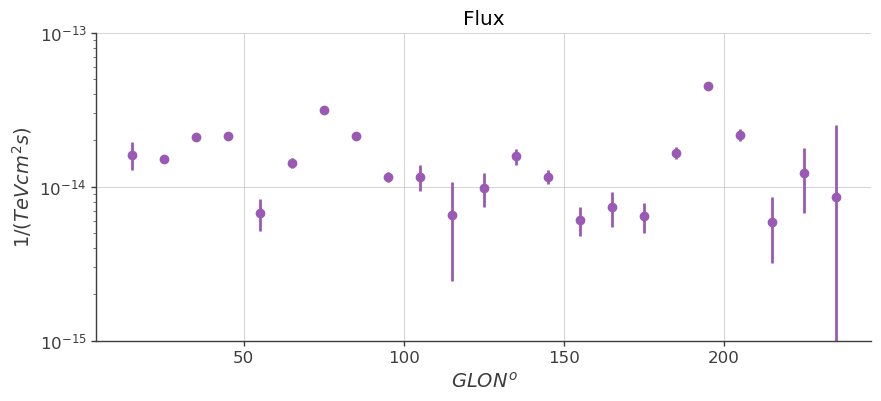

In [13]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o") #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-13)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

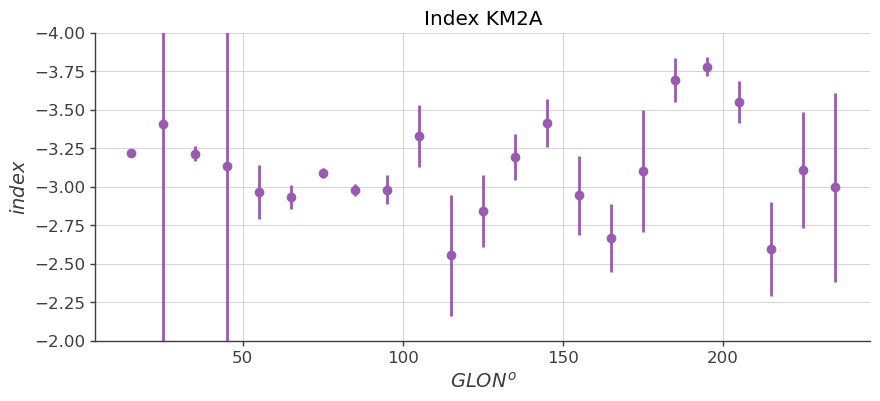

In [20]:
plt.figure(figsize=(10,4)) #

plt.errorbar(gc, di, [die, die], fmt="o")
plt.ylim(-2,-4)
plt.title("Index KM2A")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid 

roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid 

roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_40-50



WARNING RuntimeWarning: covariance is not positive-semidefinite.



processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid value encountered in long_scalars


WARNING RuntimeWarning: Mean of empty slice.


WARNING RuntimeWarning: invalid 

roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

roi_60-70


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

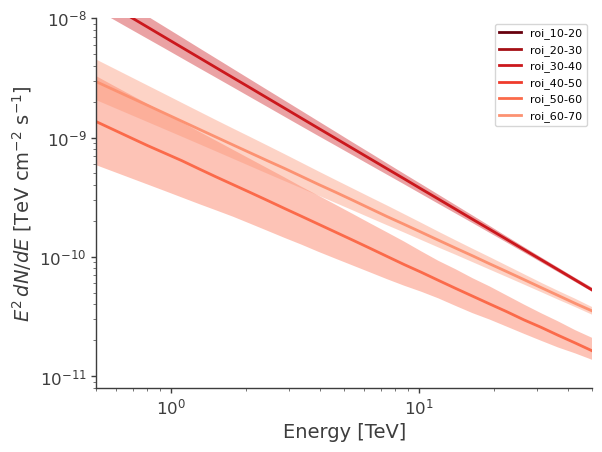

In [16]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:6]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)